In [1]:
#Import pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error

In [2]:
#Import weather data
weather = pd.read_csv("W:/Ckalib.Nelson/HackCville/Machine Learning Project/ML Competition Materials.csv")

In [3]:
#View first five results of weather data
weather.head(15)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-07-31,3.8,21.1,0.0,2.4,9.7,SSW,19.0,NaN,S,...,74.0,38.0,1026.9,1023.9,1.0,0.0,11.7,20.2,No,No
1,2011-10-09,13.7,23.5,0.2,NaN,NaN,WSW,31.0,WNW,W,...,81.0,39.0,1008.6,1004.9,NaN,NaN,17.1,22.6,No,No
2,2011-10-25,2.8,16.5,2.2,3.4,11.1,SW,41.0,NNW,SE,...,55.0,41.0,1018.2,1016.9,NaN,NaN,8.7,15.6,Yes,No
3,2010-12-19,15.0,29.0,NaN,NaN,5.7,ESE,59.0,E,ESE,...,35.0,20.0,1012.0,1008.4,NaN,NaN,22.3,28.5,NaN,Yes
4,2016-02-05,16.3,32.0,0.0,5.4,12.9,NaN,NaN,E,NaN,...,80.0,NaN,1015.5,1014.7,0.0,NaN,21.0,NaN,No,No
5,2010-05-20,11.5,21.0,0.0,1.4,5.0,ESE,24.0,NNE,NW,...,54.0,44.0,1022.2,1020.0,NaN,NaN,14.9,20.3,No,No
6,2016-07-27,9.1,14.1,10.4,NaN,NaN,SW,39.0,SSW,WSW,...,68.0,57.0,1022.7,1025.3,NaN,NaN,11.3,13.2,Yes,No
7,2011-11-20,17.0,19.5,5.0,NaN,NaN,NW,35.0,N,NNW,...,79.0,79.0,1010.4,1011.3,NaN,NaN,19.3,16.3,Yes,Yes
8,2016-11-07,2.4,15.8,0.0,NaN,NaN,WNW,61.0,WNW,WNW,...,72.0,53.0,NaN,NaN,NaN,NaN,8.5,14.8,No,No
9,2008-09-03,3.2,12.1,0.0,2.8,3.9,ESE,41.0,SE,SE,...,69.0,51.0,1033.6,1033.2,7.0,5.0,9.3,11.1,No,No


In [4]:
#View the data size
weather.size

2189770

In [5]:
#View the shape of the dataset
weather.shape

(99535, 22)

In [6]:
#View columns of datset
weather.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
#Convert date string to float
weather['Date'] = pd.to_datetime(arg=weather['Date'])
#Separating the days, months, and years into descrete columns as this data may be valuable in determining rain
weather["Month"] = weather["Date"].dt.month
weather["Day"] = weather["Date"].dt.day
weather["Year"] = weather["Date"].dt.year
#Delete the 'Date' column as it causes problems later on in scaling
del weather['Date']

In [8]:
#Check for null values
print('Let\'s check for null values\n')
print(weather.isnull().sum())

Let's check for null values

MinTemp            460
MaxTemp            235
Rainfall          1034
Evaporation      42685
Sunshine         47555
WindGustDir       6489
WindGustSpeed     6442
WindDir9am        7018
WindDir3pm        2634
WindSpeed9am       926
WindSpeed3pm      1833
Humidity9am       1231
Humidity3pm       2543
Pressure9am       9825
Pressure3pm       9802
Cloud9am         37698
Cloud3pm         40070
Temp9am            627
Temp3pm           1921
RainToday         1034
RainTomorrow         0
Month                0
Day                  0
Year                 0
dtype: int64


In [9]:
#Handle missing values. Fill the missing values with “mean” of the respective column.
from sklearn.preprocessing import Imputer

missingValuesImputer = Imputer (missing_values = 'NaN', strategy= 'mean', axis =0) #Initializing object

missingValuesImputer = missingValuesImputer.fit(weather[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']])
weather[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']] = missingValuesImputer.transform(weather[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']])

In [10]:
#Check for null values after replacing the null values w/ the mean of the column
print('Let\'s check for null values\n')
print(weather.isnull().sum())

Let's check for null values

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      6489
WindGustSpeed       0
WindDir9am       7018
WindDir3pm       2634
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday        1034
RainTomorrow        0
Month               0
Day                 0
Year                0
dtype: int64


In [11]:
#View data types of all columns in dataset
weather.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
Month              int64
Day                int64
Year               int64
dtype: object

In [12]:
#Convert objects to strings
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
weather['WindGustDir'] = enc.fit_transform(weather['WindGustDir'].astype(str))
weather['WindDir9am'] = enc.fit_transform(weather['WindDir9am'].astype(str))
weather['WindDir3pm'] = enc.fit_transform(weather['WindDir3pm'].astype(str))
weather['RainToday'] = enc.fit_transform(weather['RainToday'].astype(str))
weather['RainTomorrow'] = enc.fit_transform(weather['RainTomorrow'].astype(str))

In [13]:
#Ensure that LabelEncoder works properly
print('Let\'s ensure that all non-numerical columns are now categorized appropriately')
print(weather['WindGustDir'].unique())
print(weather['WindDir9am'].unique())
print(weather['WindDir3pm'].unique())
print(weather['RainToday'].unique())
print(weather['RainTomorrow'].unique())

Let's ensure that all non-numerical columns are now categorized appropriately
[11 15 12  2 16  7 14  4  3 13  6  8  9  1  0 10  5]
[16 14  6  0  5 11  3  9  8  7 15 10 12  4  1 13  2]
[ 8 13  9  2 16  7 15  6 14  1 10 11 12  0  4  5  3]
[0 1 2]
[0 1]


In [14]:
#View data types of all columns in dataset after conversion
weather.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed    float64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
Month              int64
Day                int64
Year               int64
dtype: object

In [15]:
#Encode categorical data - Convert categorical column in the dataset to numerical data.
weather['WindGustDir'] = enc.fit_transform(weather['WindGustDir'])
weather['WindDir9am'] = enc.fit_transform(weather['WindDir9am'])
weather['WindDir3pm'] = enc.fit_transform(weather['WindDir3pm'])
weather['RainToday'] = enc.fit_transform(weather['RainToday'])
weather['RainTomorrow'] = enc.fit_transform(weather['RainTomorrow'])

enc.classes_ #Maintains the information of the encoded values. Encode a non-numerical data into a numerical data

weather.head(15)
#Notice how all of the non-numerical columns are now numerical

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day,Year
0,3.8,21.1,0.000000,2.400000,9.700000,11,19.000000,16,8,0.0,...,1023.900000,1.000000,0.00000,11.7,20.200000,0,0,7,31,2009
1,13.7,23.5,0.200000,5.473085,7.603459,15,31.000000,14,13,7.0,...,1004.900000,4.441807,4.50803,17.1,22.600000,0,0,10,9,2011
2,2.8,16.5,2.200000,3.400000,11.100000,12,41.000000,6,9,19.0,...,1016.900000,4.441807,4.50803,8.7,15.600000,1,0,10,25,2011
3,15.0,29.0,2.339207,5.473085,5.700000,2,59.000000,0,2,30.0,...,1008.400000,4.441807,4.50803,22.3,28.500000,2,1,12,19,2010
4,16.3,32.0,0.000000,5.400000,12.900000,16,39.961297,0,16,4.0,...,1014.700000,0.000000,4.50803,21.0,21.679544,0,0,2,5,2016
5,11.5,21.0,0.000000,1.400000,5.000000,2,24.000000,5,7,6.0,...,1020.000000,4.441807,4.50803,14.9,20.300000,0,0,5,20,2010
6,9.1,14.1,10.400000,5.473085,7.603459,12,39.000000,11,15,9.0,...,1025.300000,4.441807,4.50803,11.3,13.200000,1,0,7,27,2016
7,17.0,19.5,5.000000,5.473085,7.603459,7,35.000000,3,6,9.0,...,1011.300000,4.441807,4.50803,19.3,16.300000,1,1,11,20,2011
8,2.4,15.8,0.000000,5.473085,7.603459,14,61.000000,14,14,19.0,...,1015.265737,4.441807,4.50803,8.5,14.800000,0,0,11,7,2016
9,3.2,12.1,0.000000,2.800000,3.900000,2,41.000000,9,9,17.0,...,1033.200000,7.000000,5.00000,9.3,11.100000,0,0,9,3,2008


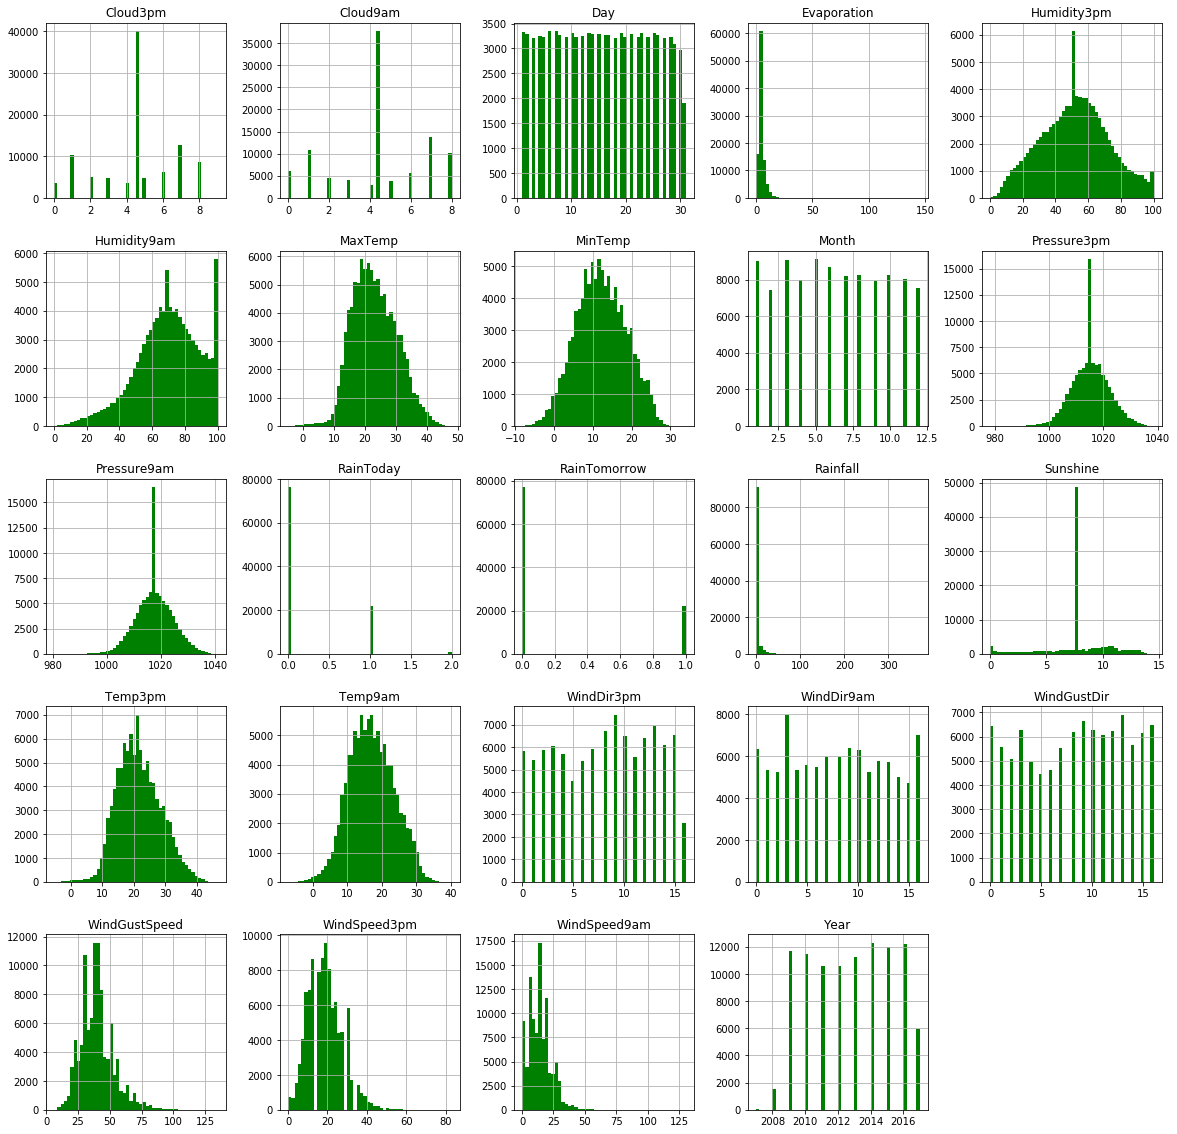

In [16]:
#Visualize distribution of results
weather.hist(bins=50, figsize=(20,20), color = 'green');

In [17]:
#Scale data (0 to 1) to normalize the relationships
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(weather)
weather_scaled = pd.DataFrame(scaler.transform(weather), index=weather.index, columns=weather.columns)
#View scaled data
weather_scaled.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day,Year
0,0.285036,0.489603,0.000000,0.016552,0.668966,0.6875,0.100775,1.000,0.5000,0.000000,...,0.757877,0.125000,0.000000,0.398734,0.491363,0.0,0.0,0.545455,1.000000,0.2
1,0.520190,0.534972,0.000539,0.037745,0.524376,0.9375,0.193798,0.875,0.8125,0.053846,...,0.442786,0.555226,0.500892,0.512658,0.537428,0.0,0.0,0.818182,0.266667,0.4
2,0.261283,0.402647,0.005930,0.023448,0.765517,0.7500,0.271318,0.375,0.5625,0.146154,...,0.641791,0.555226,0.500892,0.335443,0.403071,0.5,0.0,0.818182,0.800000,0.4
3,0.551069,0.638941,0.006305,0.037745,0.393103,0.1250,0.410853,0.000,0.1250,0.230769,...,0.500829,0.555226,0.500892,0.622363,0.650672,1.0,1.0,1.000000,0.600000,0.3
4,0.581948,0.695652,0.000000,0.037241,0.889655,1.0000,0.263266,0.000,1.0000,0.030769,...,0.605307,0.000000,0.500892,0.594937,0.519761,0.0,0.0,0.090909,0.133333,0.9


In [18]:
#View columns of dataset
weather_scaled.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Month', 'Day', 'Year'],
      dtype='object')

In [19]:
#Create a feature df from the columns
features = weather_scaled[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'Month', 'Day', 'Year']]

In [20]:
#Create a target
y_target = weather_scaled[['RainTomorrow']]

In [21]:
#Split test and training data for target object 1
#By default 75% training data and 25% testing data but we will do 80% training data and 20% testing data
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    y_target,
                                                    test_size=.2,
                                                    random_state=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
#View shape of train and test data sets for both feature and response
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(79628, 22) (19907, 22) (79628, 1) (19907, 1)


In [23]:
#Train a logistic regression model on the training set
logReg = LogisticRegression()
logReg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
#make predictions for the testing set
y_predict = logReg.predict(x_test)
y_predict

array([0., 0., 0., ..., 0., 1., 0.])

In [25]:
# Probabilities
y_proba = logReg.predict_proba(x_test)
y_proba

array([[0.73439731, 0.26560269],
       [0.90984427, 0.09015573],
       [0.98226414, 0.01773586],
       ...,
       [0.67187792, 0.32812208],
       [0.03423367, 0.96576633],
       [0.8102853 , 0.1897147 ]])

In [26]:
#check for accuracy
from sklearn import metrics
print (metrics.accuracy_score(y_test,y_predict))

0.8399055608579896


In [27]:
print(accuracy_score(y_predict, y_test)) # instead of r2_score, categorical variables use the accuracy_score to check accuracy
logReg.score(x_test, y_test)

0.8399055608579896


0.8399055608579896

In [28]:
y_predict = pd.DataFrame(y_predict)
comparison = pd.concat([y_test.reset_index(), y_predict], axis=1).set_index('index') # to show where the differences are
comparison.head(15)

,RainTomorrow,0
index,,
34091,1.0,0.0
13566,1.0,0.0
32636,0.0,0.0
10527,0.0,0.0
76597,0.0,0.0
26007,0.0,0.0
71239,0.0,0.0
29358,0.0,0.0
43710,0.0,0.0
